<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_PCA(Principal_Component_Analysis)_wine_quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

Loading dataset

In [25]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [26]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [27]:
wine_data.to_csv('wine_data.csv', index=False)

Applying PCA

In [28]:
# Separate features and target
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']              # Target (wine quality)

In [29]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [31]:
# Explained Variance and Cumulative Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

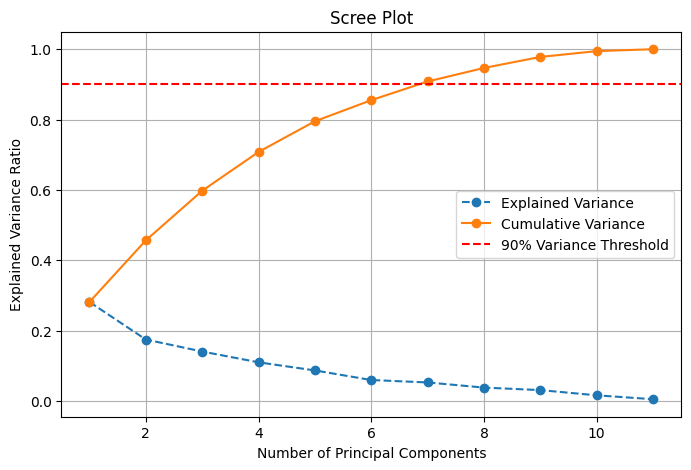

In [32]:
# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.axhline(0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

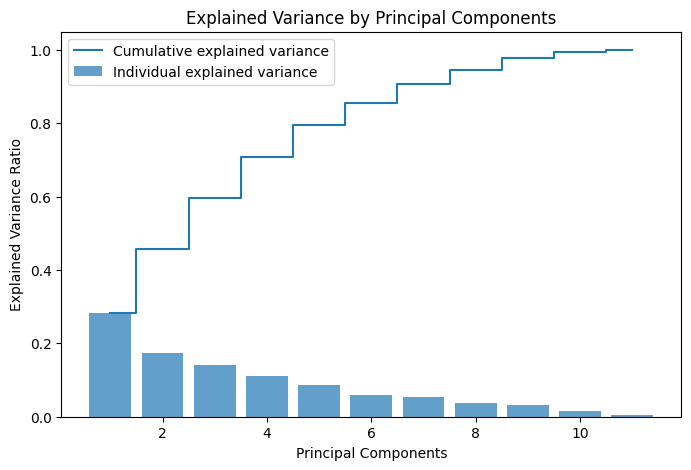

In [33]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()


In [34]:
# Choose the number of components (e.g., 2 for visualization)
n_components = 2
pca_2d = PCA(n_components=n_components)
X_pca_2d = pca_2d.fit_transform(X_scaled)


In [35]:
# Reconstruction of data
X_reconstructed = pca_2d.inverse_transform(X_pca_2d)

In [36]:
# Calculate Reconstruction Error
reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f"Reconstruction Error: {reconstruction_error:.4f}")

Reconstruction Error: 0.5432


In [37]:
# Explained Variance for selected components
explained_variance_selected = pca_2d.explained_variance_ratio_
cumulative_variance_selected = explained_variance_selected.sum()
print(f"Explained Variance Ratio (for {n_components} components): {explained_variance_selected}")
print(f"Cumulative Variance Explained (for {n_components} components): {cumulative_variance_selected:.4f}")


Explained Variance Ratio (for 2 components): [0.28173931 0.1750827 ]
Cumulative Variance Explained (for 2 components): 0.4568


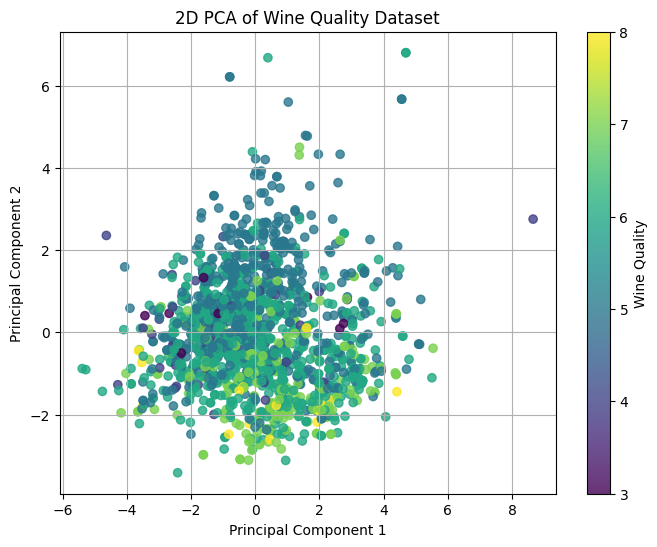

In [38]:
# 2D Visualization of PCA
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.colorbar(scatter, label='Wine Quality')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Quality Dataset')
plt.grid()
plt.show()

In [39]:
# 3D Visualization of PCA (for first 3 components)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

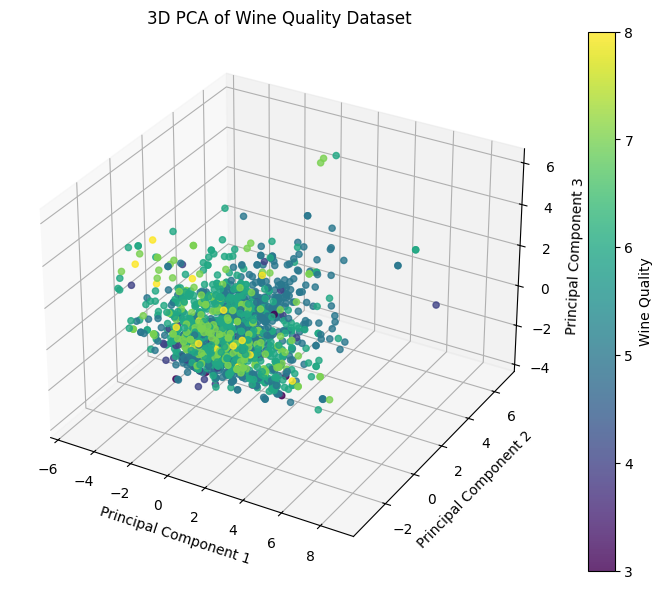

In [41]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', alpha=0.8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Wine Quality Dataset')
fig.colorbar(scatter, label='Wine Quality')
plt.show()